In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [3]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [7]:
# a function that will return the sersic profile for an elliptical system 
def SersicE(R,Re,n,Mtot):
    # inputs:
    # R is an array of radii in kpc
    # Re is the half light radius in kpc
    # n is the Sersic index 
    # Mtot is the total stellar mass, in Msun 
    # returns the surface brightness profile in Lsun/kpc^2
    
    # Assuming light to mass ratio is 1
    L = Mtot # total luminosity = total mass
    
    Ie =L/7.2/np.pi/Re**2
    
    #exponent term
    A = (R/Re)**(1/n) - 1 
    
    return Ie * np.exp(-7.67*A)

# Part B

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 


In [11]:
M31 = MassProfile("M31",0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [12]:
r = np.arange(0.1,30,0.1)

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 


In [18]:
BulgeMass = M31.MassEnclosed(3,r).value #particle type 3 = bulge

In [19]:
BulgeMass[10]

4438643010.0

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [21]:
# I = L / 4 pi D^2

BulgeI = BulgeMass/4/np.pi/r**2

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [32]:
# find radius where BulgeI drops by half from maximum 

# first find total bulge mass/luminosity
BulgeTotal = np.max(BulgeMass)

In [33]:
Low = BulgeTotal/2
High = BulgeTotal/2 + BulgeTotal/2*0.01

In [36]:
index = np.where((BulgeMass > Low) & (BulgeMass < High))
Re = r[index] # arrays are ordered the exact same way

# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

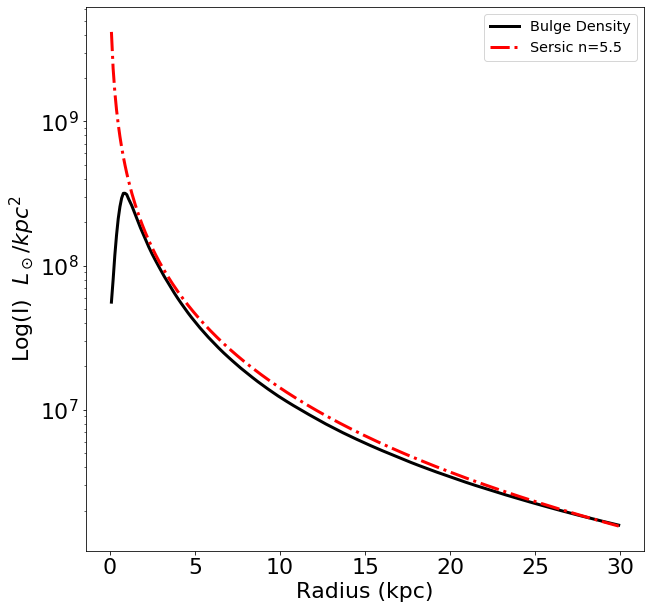

In [43]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(r,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
plt.semilogy(r,SersicE(r,Re,5.5,BulgeTotal), color='red', linestyle='-.', linewidth=3, label='Sersic n=5.5')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
